In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

In [6]:
# Read file
df_vic = pd.read_csv('VIC.csv', sep = ',')
df_vic = df_vic.iloc[0:10000, :]
df_vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


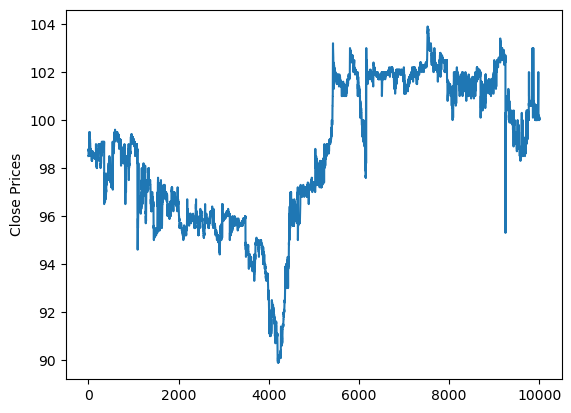

In [7]:
df_vic['Close'].plot()
plt.ylabel("Close Prices")
plt.show()

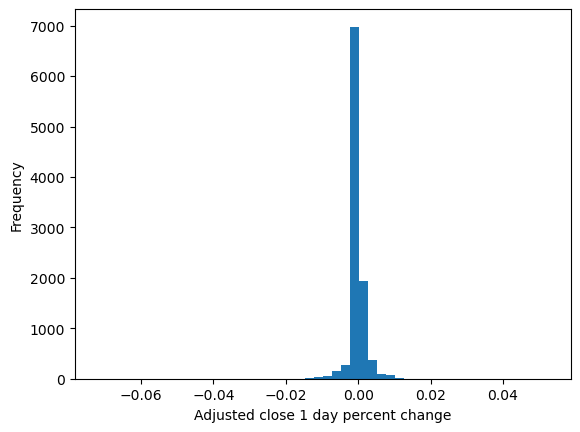

In [8]:
df_vic['Close'].pct_change().plot.hist(bins=50)
plt.xlabel("Adjusted close 1 day percent change")
plt.show()

In [9]:
# Define the features and the target variable
feature_names = ['Open', 'Volume']
target = 'Close'

In [10]:
df_vic['Volume_1d_change'] = df_vic['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [12]:
df_vic['5d_future_close'] = df_vic['Close'].shift(-1)
df_vic['5d_close_future_pct'] = df_vic['5d_future_close'].pct_change(1)

In [15]:
df_vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Volume_1d_change,5d_future_close,5d_close_future_pct
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0,NaN,98.5,NaN
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0,0.948718,98.6,0.001015
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0,1.710526,98.6,0.000000
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0,1.689320,98.7,0.001014
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0,-0.862816,98.7,0.000000


In [16]:
df_vic.dropna(inplace=True)

X = df_vic[feature_names]
y = df_vic['5d_close_future_pct']

train_size = int(0.85 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [36]:
grid = {'n_estimators': [100,200,300], 'max_depth': [2,4,6], 'max_features': [2,4,6], 'random_state': [20]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g) 
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index]) # A positive score(0.00192..) indicates that the model performs well

-0.021109018562420312 {'random_state': 20, 'n_estimators': 100, 'max_features': 2, 'max_depth': 2}


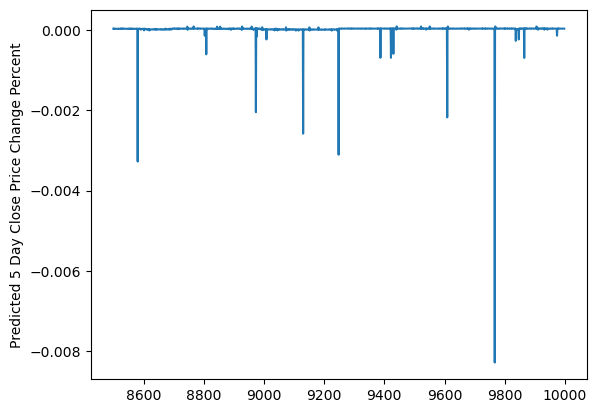

In [38]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=2, max_features=4, random_state=40)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.0016216103339686296
Mean Squared Error: 1.5315464496738414e-05
Root Mean Squared Error: 0.0039134977317916535


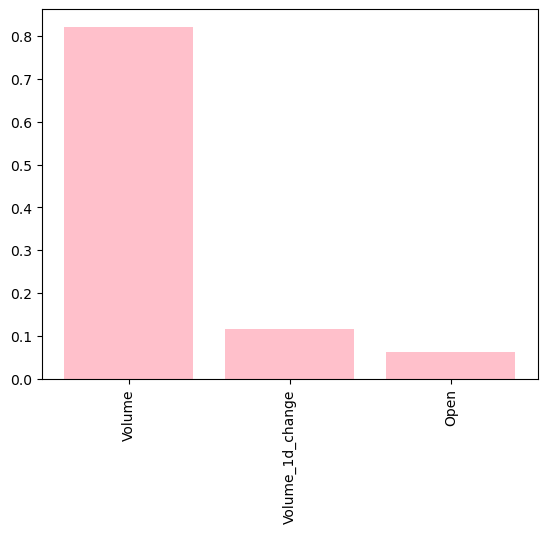

In [42]:
importances = rf_model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x_values = range(len(importances))
labels = np.array(feature_names)[sorted_index]
plt.bar(x_values, importances[sorted_index], tick_label=labels, color='pink')
plt.xticks(rotation=90)
plt.show()
